<a href="https://colab.research.google.com/github/DEBMALYAMAJUMDER/stock-forecast/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d forderation/breakhis-400x

 99% 798M/803M [00:05<00:00, 99.9MB/s]
100% 803M/803M [00:05<00:00, 149MB/s] 


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  breakhis-400x.zip
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-003.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-005.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-007.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-011.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-015.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-019.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-025.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-027.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-028.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-006.png  
  inflating: BreaKHis 400X/test/beni

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,losses,Model
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [ ]:
import os
import gc
import cv2
import json
import math
import scipy
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from keras import layers
from tensorflow.keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras import layers
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
from tqdm import tqdm
from keras import backend as K
from functools import partial
from collections import Counter
%matplotlib inline


In [ ]:
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
)
BATCH_SIZE = 16

def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG


In [ ]:
benign_train = np.array(Dataset_loader('/content/BreaKHis 400X/train/benign',224))
malign_train = np.array(Dataset_loader('/content/BreaKHis 400X/train/malignant',224))
benign_test = np.array(Dataset_loader('/content/BreaKHis 400X/test/benign',224))
malign_test = np.array(Dataset_loader('/content/BreaKHis 400X/test/malignant',224))

100%|██████████| 369/369 [00:06<00:00, 61.47it/s]


In [ ]:
# Create labels
benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test))
label =  {0:"benign",1:"malignant"}

# Merge data 
X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)
X_test = np.concatenate((benign_test, malign_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis = 0)

# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

# Shuffle test data
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

# To categorical
Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)

x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)


In [ ]:
files = []

for root, _,filenames in os.walk('/content/BreaKHis 400X/train'):
  for filename in filenames:
    files.append(os.path.join(root,filename))
X_train = []
for f in files:
  X_train.append(resize(plt.imread(f),(224,224,3),anti_aliasing=True))

In [ ]:
x_train=[]
for i in X_train:
  x_train.append(i)
x_train=np.array(x_train)

In [ ]:
x_train.shape

(1148, 224, 224, 3)

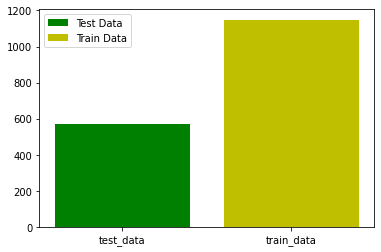

In [ ]:
#visualize data
fig, axis = plt.subplots()
axis.bar("test_data", 572, color='g', label='Test Data')
axis.bar("train_data",1148 , color='y', label='Train Data')
legend = axis.legend()

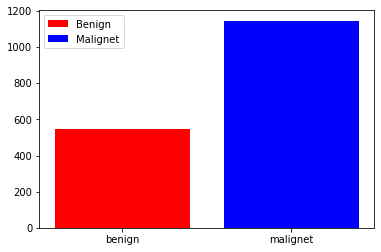

In [ ]:
#visualize data
fig, axis = plt.subplots()
axis.bar("benign", 547, color='r', label='Benign')
axis.bar("malignet",1146 , color='b', label='Malignet')
legend = axis.legend()

malignant  benign  benign  malignant  malignant  malignant  benign  malignant  malignant  malignant  benign  malignant  malignant  benign  malignant  malignant


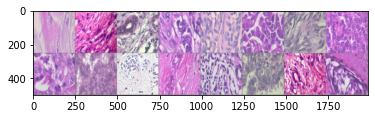

In [ ]:
 # Image display function
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap='Greys')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=False)
print('  '.join(classes[labels[j]] for j in range(batch_size_train)))

Data Preproessing

In [ ]:
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)))
encoder.add(layers.MaxPooling2D(2, strides=2))
encoder.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D(2, strides=2))
encoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D(2, strides=2))
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

In [ ]:
decoder = models.Sequential()
decoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', input_shape=encoder.output.shape[1:]))
decoder.add(layers.UpSampling2D(2))
decoder.add(layers.Conv2D(16, 3, strides=1, padding='same', activation='relu'))
decoder.add(layers.UpSampling2D(2))
decoder.add(layers.Conv2D(3, 3, strides=1, padding='same', activation='relu'))
decoder.add(layers.UpSampling2D(2))
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 up_sampling2d (UpSampling2D  (None, 56, 56, 128)      0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 16)        18448     
                                                                 
 up_sampling2d_1 (UpSampling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 3)       435       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 224, 224, 3)     

In [ ]:
conv_autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.outputs))
conv_autoencoder.compile(optimizer='adam', loss=losses.mean_squared_error)
history = conv_autoencoder.fit(x_train, x_train, batch_size=64, epochs=10)

Epoch 1/10
18/18 [==============================] - 7s 271ms/step - loss: 0.0921
Epoch 2/10
18/18 [==============================] - 5s 270ms/step - loss: 0.0183
Epoch 3/10
18/18 [==============================] - 5s 270ms/step - loss: 0.0126
Epoch 4/10
18/18 [==============================] - 5s 271ms/step - loss: 0.0092
Epoch 5/10
18/18 [==============================] - 5s 271ms/step - loss: 0.0074
Epoch 6/10
18/18 [==============================] - 5s 272ms/step - loss: 0.0062
Epoch 7/10
18/18 [==============================] - 5s 269ms/step - loss: 0.0055
Epoch 8/10
18/18 [==============================] - 5s 270ms/step - loss: 0.0050
Epoch 9/10
18/18 [==============================] - 5s 271ms/step - loss: 0.0047
Epoch 10/10
18/18 [==============================] - 5s 267ms/step - loss: 0.0048


In [ ]:
conv_autoencoder.save('model.h5')

In [ ]:
x_train=conv_autoencoder.predict(X_train)

In [ ]:
def show_img(X,n=5,title=""):
    plt.figure(figsize=(15,5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize = 20)

In [ ]:
B = encoder.predict(X_train)

In [ ]:
B = x_train.reshape((len(B),28*28*128))
B.shape

(1148, 100352)

In [ ]:
def show_data(X,n=5,height=28,width=28,title=""):
    plt.figure(figsize=(15,5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape(height,width))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize = 20)
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


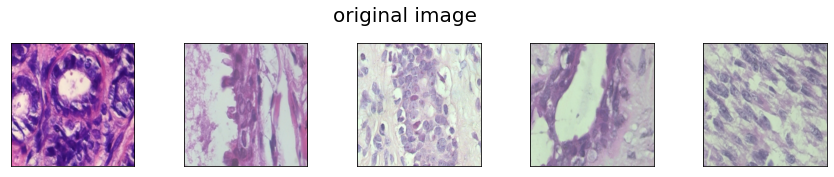

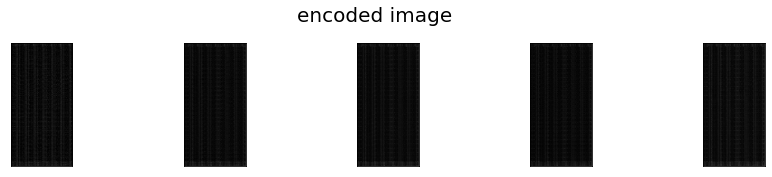

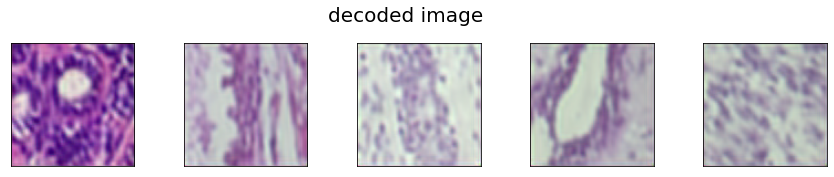

In [ ]:
show_img(X_train , title="original image")
show_data(B ,height=28*16,width=28*8,title="encoded image")
show_img(x_train , title="decoded image")

Model

In [ ]:
#build cnn
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(Conv2D(16, (3, 3), padding="valid", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding="same"))
    model.add(Conv2D(32, (3, 3), padding="valid", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding="same"))
    model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding="same"))
    model.add(Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model

K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
model = build_model(resnet ,lr = 1e-4)
model.summary()


74850304/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 16)          276496    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#early stop  to avoid overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
history = model.fit(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=12,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)


Epoch 1/12
57/57 [==============================] - 42s 720ms/step - loss: 0.3557 - accuracy: 0.8725 - val_loss: 0.3404 - val_accuracy: 0.8957
Epoch 2/12
57/57 [==============================] - 41s 718ms/step - loss: 0.3209 - accuracy: 0.8943 - val_loss: 0.3536 - val_accuracy: 0.8435
Epoch 3/12
57/57 [==============================] - 41s 717ms/step - loss: 0.3827 - accuracy: 0.8617 - val_loss: 0.2696 - val_accuracy: 0.9478
Epoch 4/12
57/57 [==============================] - 41s 717ms/step - loss: 0.3850 - accuracy: 0.8410 - val_loss: 0.2433 - val_accuracy: 0.9261
Epoch 5/12
57/57 [==============================] - 41s 717ms/step - loss: 0.3657 - accuracy: 0.8638 - val_loss: 0.1912 - val_accuracy: 0.9304
Epoch 6/12
57/57 [==============================] - 41s 715ms/step - loss: 0.2969 - accuracy: 0.8922 - val_loss: 0.2023 - val_accuracy: 0.9522
Epoch 7/12
57/57 [==============================] - 41s 716ms/step - loss: 0.3172 - accuracy: 0.8824 - val_loss: 0.3521 - val_accuracy: 0.9087

In [ ]:
#evaluate model
model.evaluate(x_val, y_val)

8/8 [==============================] - 3s 316ms/step - loss: 0.2541 - accuracy: 0.9348


[0.25407570600509644, 0.9347826242446899]

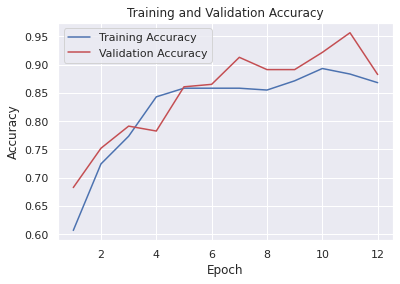

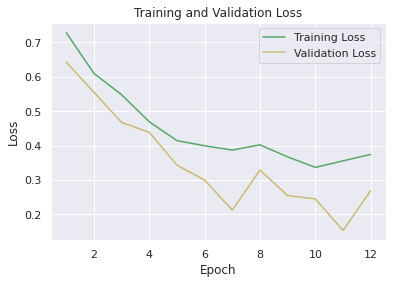

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, accuracy, color='b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, color='r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='g', label='Training Loss')
plt.plot(epochs, val_loss, color='y', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)
Y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [ ]:
Y_test = np.argmax(Y_test,axis=1)
Y_test

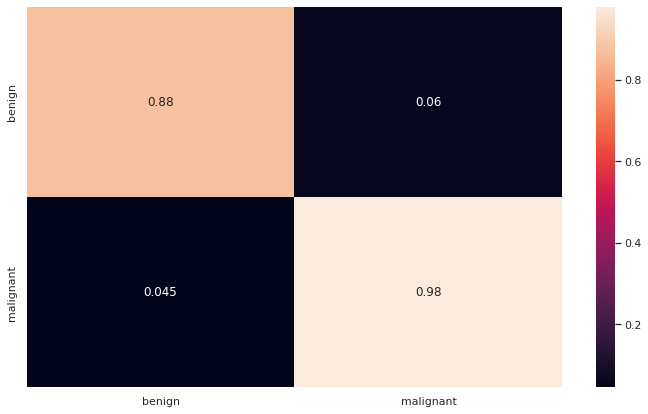

In [ ]:
# Build confusion matrix
# Post-deep learning analysis
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix, axis=1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
print(classification_report(Y_test, Y_pred,labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       176
           1       0.94      0.98      0.96       369

    accuracy                           0.94       545
   macro avg       0.95      0.93      0.94       545
weighted avg       0.95      0.94      0.94       545

